<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Машинное обучение и майнинг данных"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

## Домашнее задание 2. Анализ данных по перелетам между городами США в 2008 году с помощью Pandas и Seaborn. Решение

In [1]:
# Python 2 and 3 compatibility
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (~ 114 Mb, при разархивации - ~ 690 Mb). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).
Данные  содержат перелеты между аэропортами США в 2008 году.

**Считаем данные в память в объект Pandas.DataFrame (это может занять пару минут).**

In [2]:
flights_df = pd.read_csv('../../data/flights_2008.csv.bz2')

In [3]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 29)
Index([u'Year', u'Month', u'DayofMonth', u'DayOfWeek', u'DepTime',
       u'CRSDepTime', u'ArrTime', u'CRSArrTime', u'UniqueCarrier',
       u'FlightNum', u'TailNum', u'ActualElapsedTime', u'CRSElapsedTime',
       u'AirTime', u'ArrDelay', u'DepDelay', u'Origin', u'Dest', u'Distance',
       u'TaxiIn', u'TaxiOut', u'Cancelled', u'CancellationCode', u'Diverted',
       u'CarrierDelay', u'WeatherDelay', u'NASDelay', u'SecurityDelay',
       u'LateAircraftDelay'],
      dtype='object')


In [4]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
CRSDepTime,1955,735,620,930,1755
ArrTime,2211,1002,804,1054,1959
CRSArrTime,2225,1000,750,1100,1925
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920


In [5]:
flights_df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728,7009728.000000,7009728.000000,7009728.000000,6873482.000000,7009728.000000,6858079.000000,7009728.000000,7009728.000000,6855029.000000,...,7009728.000000,6858079.000000,6872670.000000,7009728.000000,7009728.000000,1524735.000000,1524735.000000,1524735.000000,1524735.000000,1524735.000000
mean,2008,6.375130,15.728015,3.924182,1333.830046,1326.085663,1481.258227,1494.801154,2224.200105,127.322424,...,726.387029,6.860852,16.453045,0.019606,0.002463,15.772063,3.039031,17.164623,0.074974,20.770981
std,0,3.406737,8.797068,1.988259,478.068895,464.250911,505.225129,482.672822,1961.715999,70.187308,...,562.101803,4.933649,11.332799,0.138643,0.049568,40.099116,19.502874,31.894955,1.837940,39.259636
min,2008,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,12.000000,...,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008,3.000000,8.000000,2.000000,928.000000,925.000000,1107.000000,1115.000000,622.000000,77.000000,...,325.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008,6.000000,16.000000,4.000000,1325.000000,1320.000000,1512.000000,1517.000000,1571.000000,110.000000,...,581.000000,6.000000,14.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000
75%,2008,9.000000,23.000000,6.000000,1728.000000,1715.000000,1909.000000,1907.000000,3518.000000,157.000000,...,954.000000,8.000000,19.000000,0.000000,0.000000,16.000000,0.000000,21.000000,0.000000,26.000000
max,2008,12.000000,31.000000,7.000000,2400.000000,2359.000000,2400.000000,2400.000000,9743.000000,1379.000000,...,4962.000000,308.000000,429.000000,1.000000,1.000000,2436.000000,1352.000000,1357.000000,392.000000,1316.000000


**Число уникальных рейсов:**

In [5]:
flights_df['FlightNum'].nunique()

7539

**Мы можем выполнять группировки для расчета различных аггрегированных статистик.**

**Найдем топ-3 рейсов, совершивших самые длинные перелеты за 2008 год.**

In [6]:
flights_df.groupby('FlightNum')['Distance']\
  .sum().sort_values(ascending=False)\
  .iloc[0:3]

FlightNum
1     7793942
15    7639878
2     6888300
Name: Distance, dtype: int64

**Или так:**

In [7]:
flights_df.groupby('FlightNum')\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': {'_total': np.sum}})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Cancelled     Distance               
             _total         mean      sum count
FlightNum                                      
1                42  1925.380929  7793942  4048
15               51  1823.795178  7639878  4189
2                53  1873.347838  6888300  3677

**Построение сводной таблицы:**

In [9]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**Бывает удобно "раскрашивать" такие сводные таблицы:**

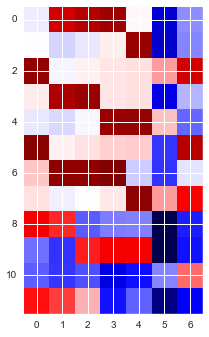

In [10]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic',interpolation='none')

**Гистограмма длин перелетов.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e3be390>]], dtype=object)

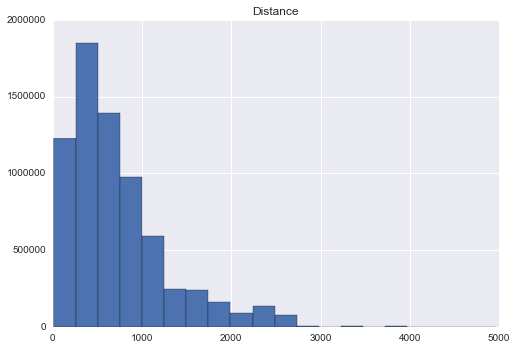

In [11]:
flights_df.hist('Distance', bins=20)

**Гистограмма частот перелетов в зависимости от даты.**

In [12]:
flights_df['Date'] = pd.to_datetime(flights_df.Year*10000 + 
                                    flights_df.Month*100 + 
                                    flights_df.DayofMonth, 
                            format='%Y%m%d')

In [13]:
num_flights_by_date = flights_df.groupby('Date')['FlightNum'].agg('count')

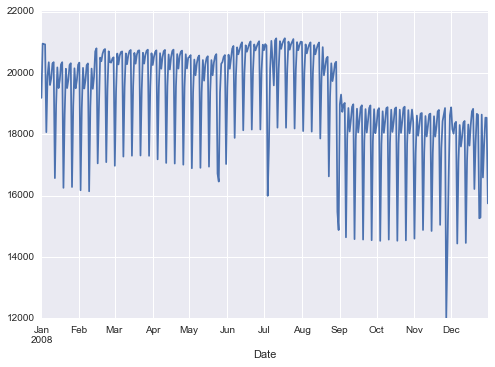

In [14]:
num_flights_by_date.plot()

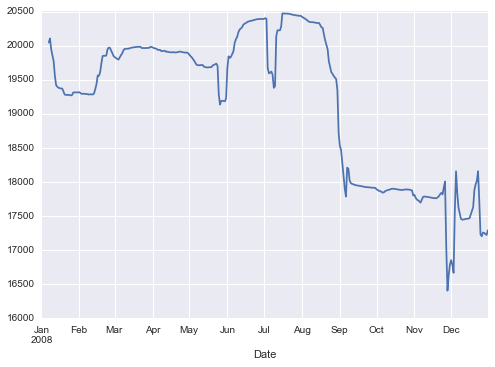

In [15]:
pd.rolling_mean(num_flights_by_date, 7).plot()

**1. Найдите топ-10 массовых перевозчиков.**

In [8]:
flights_df['UniqueCarrier'].value_counts().iloc[0:10,]

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

**2. Постройте распределение причин отмены рейсов.**

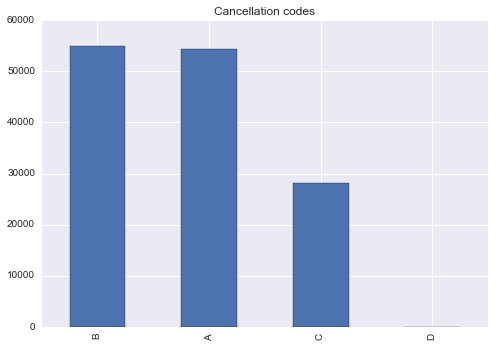

In [17]:
flights_df['CancellationCode'].value_counts()\
    .plot(kind='bar', title="Cancellation codes")

В описании признаков указано, что значения кодов причин задержек: B - из-за погоды, A - из-за перевозчика, C - по решению National Air System, D - из соображений безопасности. 

**3. Найдите самый популярный маршрут, отобразите статистику по данному маршруту.**

In [22]:
flights_df['Route'] = flights_df['Origin'] + '->' + flights_df['Dest']
popular_route = flights_df['Route'].mode().values[0]
print(popular_route)
pop_flight = flights_df[flights_df['Route'] == popular_route]
pop_flight.describe()

SFO->LAX


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,13788,13788.000000,13788.000000,13788.000000,13299.000000,13788.000000,13286.000000,13788.000000,13788.000000,13285.000000,...,13788,13286.000000,13299.000000,13788.000000,13788.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,2008,6.337322,15.730418,3.862997,1371.032408,1356.596388,1481.378820,1493.550116,1862.825573,82.417840,...,337,9.912163,17.273554,0.035466,0.001015,9.689688,0.360280,7.630808,0.026416,42.157225
std,0,3.358147,8.791381,1.973866,489.328348,472.940974,502.009856,473.465680,1999.167552,10.184247,...,0,5.120369,7.126813,0.184960,0.031850,27.959199,8.216006,16.685259,1.009160,46.774688
min,2008,1.000000,1.000000,1.000000,3.000000,540.000000,1.000000,5.000000,4.000000,58.000000,...,337,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008,3.000000,8.000000,2.000000,941.000000,945.000000,1054.000000,1110.000000,817.000000,75.000000,...,337,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2008,6.000000,16.000000,4.000000,1355.000000,1315.000000,1507.000000,1443.000000,1153.000000,81.000000,...,337,9.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000
75%,2008,9.000000,23.000000,5.000000,1809.000000,1756.000000,1919.000000,1920.000000,1957.000000,88.000000,...,337,12.000000,20.000000,0.000000,0.000000,7.000000,0.000000,11.000000,0.000000,64.000000
max,2008,12.000000,31.000000,7.000000,2400.000000,2240.000000,2400.000000,2359.000000,7815.000000,196.000000,...,337,106.000000,84.000000,1.000000,1.000000,339.000000,406.000000,401.000000,54.000000,373.000000


**4. Найдите топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?**

In [20]:
for delay_type in ['CarrierDelay', 'WeatherDelay','NASDelay',
               'SecurityDelay', 'LateAircraftDelay']:
    print(delay_type)
    sub_df = flights_df[flights_df[delay_type] > 0]
    top_races = sub_df['FlightNum'].value_counts().iloc[0:5,].index
    print("Top races are: {0}".format(list(top_races)))
    for race in top_races:
        print("Race {0} carriers: {1}".format(race, sub_df[sub_df['FlightNum'] == race]['UniqueCarrier'].unique()))

CarrierDelay
Top races are: [12, 15, 16, 44, 50]
Race 12 carriers: ['WN' 'XE' 'UA' 'US' 'DL' 'HA' 'AS' 'B6' 'CO' 'FL']
Race 15 carriers: ['WN' 'XE' 'UA' 'DL' 'HA' 'AA' 'AS' 'B6' 'CO' 'FL' 'US']
Race 16 carriers: ['WN' 'XE' 'UA' 'US' 'DL' 'HA' 'AA' 'AS' 'B6' 'CO' 'FL']
Race 44 carriers: ['WN' 'UA' 'US' 'DL' 'HA' 'AS' 'B6' 'FL' 'CO']
Race 50 carriers: ['WN' 'XE' 'UA' 'US' 'DL' 'B6' 'CO' 'FL']
WeatherDelay
Top races are: [539, 449, 648, 549, 653]
Race 539 carriers: ['WN' 'CO' 'F9' 'AA' 'UA' 'DL' 'FL' 'NW']
Race 449 carriers: ['F9' 'CO' 'FL' 'WN' 'UA' 'NW' 'AA']
Race 648 carriers: ['NW' 'CO' 'WN' 'FL' 'UA' 'DL' 'AA' 'US' 'AS']
Race 549 carriers: ['UA' 'DL' 'AA' 'CO' 'NW' 'FL' 'WN' 'HA']
Race 653 carriers: ['NW' 'UA' 'F9' 'AS' 'FL' 'AA']
NASDelay
Top races are: [75, 321, 701, 378, 15]
Race 75 carriers: ['WN' 'UA' 'US' 'DL' 'FL' 'AA' 'AS' 'B6']
Race 321 carriers: ['WN' 'UA' 'US' 'FL' 'NW' 'AA' 'AS' 'CO' 'XE' 'DL' 'B6']
Race 701 carriers: ['WN' 'UA' 'US' 'DL' 'FL' 'NW' 'AA' 'B6' 'CO']
Race 37

**5. Определите, как распределено количество рейсов в зависимости от времени дня?**

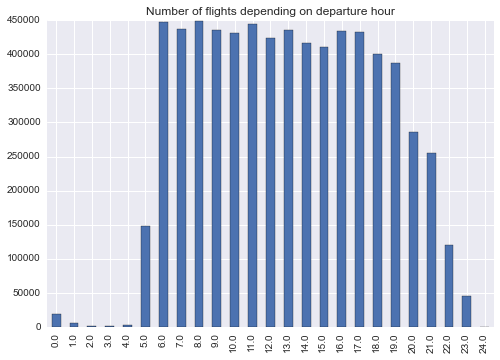

In [24]:
flights_df['DepHour'] = (flights_df['DepTime'] / 100).apply(np.floor) 
flights_df['DepHour'].value_counts(sort=False).plot(kind='bar',
        title="Number of flights depending on departure hour")

**6. Опишите, как число полетов меняется во времени (по дням/неделям/месяцам), и проинтерпретируйте.**

По выходным перелетов меньше.

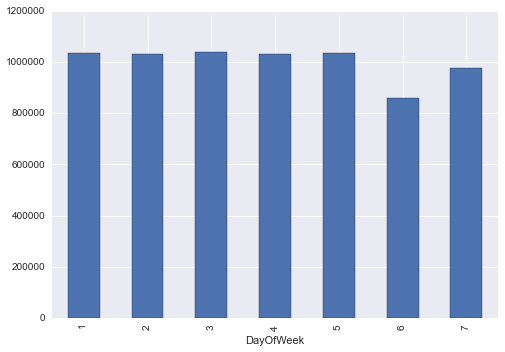

In [25]:
num_flights_by_day_of_week = flights_df.groupby('DayOfWeek')['FlightNum'].agg('count')
num_flights_by_day_of_week.plot(kind='bar')

Кстати, любопытный эффект из серии "как врать с помощью статистики" (сравните следующую картинку с предыдущей):

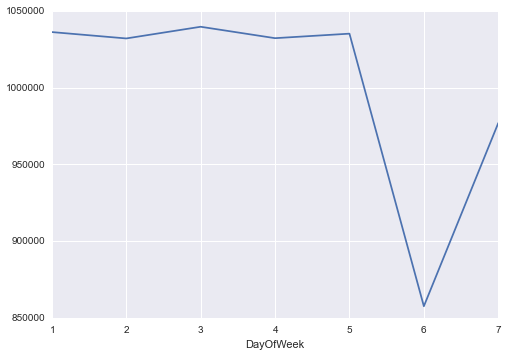

In [26]:
num_flights_by_day_of_week.plot()

Зимой перелетов меньше, чем летом.

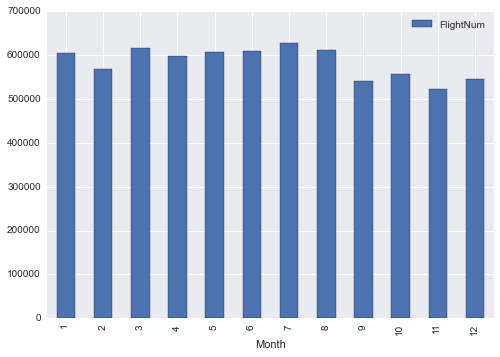

In [27]:
num_flights_by_month = flights_df.groupby('Month').agg({'FlightNum':np.size})
num_flights_by_month.plot(kind='bar')

Зависимости от дня в месяце нет (перелетов 30го и 31го меньше только потому, что не во все месяцы есть эти дни).

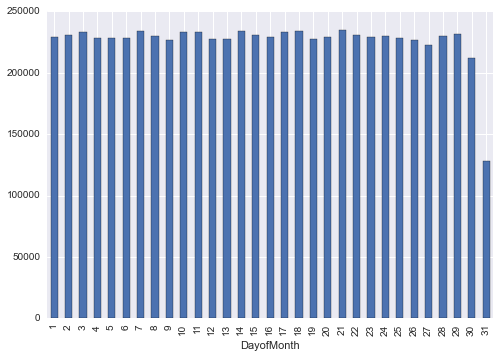

In [28]:
num_flights_by_day_of_month = flights_df.groupby('DayofMonth')['FlightNum'].agg('count')
num_flights_by_day_of_month.plot(kind='bar')